# Data Preprocessing

It involves below steps:
- Getting the dataset
- Importing libraries
- Importing datasets
- Finding Missing Data
- Encoding Categorical Data
- Splitting dataset into training and test set
- Feature scaling

# 1. Getting the Dataset
Is the process of getting your dataset ready

# 2. Importing Libraries



In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 3. Importing the Datasets

In [43]:
data = pd.read_csv(r"C:\Users\khali\Downloads\weather_forecast.csv")  

In [44]:
print(data)

     Outlook Temperature Humidity   Windy Play  Estimation
0      Sunny         Hot     High    Weak   No        40.0
1      Sunny         Hot     High  Strong   No        38.0
2   Overcast         Hot     High    Weak  Yes        35.0
3       Rain        Mild     High    Weak  Yes        32.0
4       Rain        Cool   Normal    Weak  Yes        30.0
5       Rain        Cool   Normal  Strong   No        28.0
6   Overcast        Cool   Normal  Strong  Yes         NaN
7      Sunny        Mild     High    Weak   No        33.0
8      Sunny        Cool   Normal    Weak  Yes        35.0
9       Rain        Mild   Normal    Weak  Yes        33.0
10     Sunny        Mild   Normal  Strong  Yes        36.0
11  Overcast        Mild     High  Strong  Yes         NaN
12  Overcast         Hot   Normal    Weak  Yes        38.0
13      Rain        Mild     High  Strong   No        34.0


In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Outlook      14 non-null     object 
 1   Temperature  14 non-null     object 
 2   Humidity     14 non-null     object 
 3   Windy        14 non-null     object 
 4   Play         14 non-null     object 
 5   Estimation   12 non-null     float64
dtypes: float64(1), object(5)
memory usage: 800.0+ bytes


In [47]:
data.describe()

,Estimation
count,12.000000
mean,34.333333
std,3.446562
min,28.000000
25%,32.750000
50%,34.500000
75%,36.500000
max,40.000000


## Extracting dependent and independent variables:
In our dataset, there are three independent variables that are Country, Age, and Salary, and one is a dependent variable which is Purchased.

### Extracting independent variable:

To extract an independent variable, we will use iloc[ ] method of Pandas library. It is used to extract the required rows and columns from the dataset.

In [48]:
x= data.iloc[:,:-1].values 

In the above code, the first colon(:) is used to take all the rows, and the second colon(:) is for all the columns. Here we have used :-1, because we don't want to take the last column as it contains the dependent variable. So by doing this, we will get the matrix of features.

### Extracting dependent variable:

To extract dependent variables, again, we will use Pandas .iloc[] method.

In [49]:
y= data.iloc[:,3].values  

In [50]:
print(x)

[['Sunny' 'Hot' 'High' 'Weak' 'No']
 ['Sunny' 'Hot' 'High' 'Strong' 'No']
 ['Overcast' 'Hot' 'High' 'Weak' 'Yes']
 ['Rain' 'Mild' 'High' 'Weak' 'Yes']
 ['Rain' 'Cool' 'Normal' 'Weak' 'Yes']
 ['Rain' 'Cool' 'Normal' 'Strong' 'No']
 ['Overcast' 'Cool' 'Normal' 'Strong' 'Yes']
 ['Sunny' 'Mild' 'High' 'Weak' 'No']
 ['Sunny' 'Cool' 'Normal' 'Weak' 'Yes']
 ['Rain' 'Mild' 'Normal' 'Weak' 'Yes']
 ['Sunny' 'Mild' 'Normal' 'Strong' 'Yes']
 ['Overcast' 'Mild' 'High' 'Strong' 'Yes']
 ['Overcast' 'Hot' 'Normal' 'Weak' 'Yes']
 ['Rain' 'Mild' 'High' 'Strong' 'No']]


# 4. Handling Missing data
There are mainly two ways to handle missing data, which are:
- Deleting the particular row
- Calculating the mean

To handle missing values, we will use $Scikit-learn library$ in our code, which contains various libraries for building machine learning models. Here we will use Imputer class of $sklearn.preprocessing$ library.

In [51]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer


# Create a DataFrame
df = pd.DataFrame(data)

# Separate the independent variables (features) and dependent variable (target)
x = df.iloc[:, :-1].values  # All columns except the last one
y = df.iloc[:, -1].values   # The last column

# Create the imputer object with the strategy to replace missing values with the mean
imputer = SimpleImputer(strategy='mean')

# Fit the imputer to the 'Estimation' column and transform the data
df['Estimation'] = imputer.fit_transform(df[['Estimation']])




In [52]:
# Print the updated DataFrame
print(df)

     Outlook Temperature Humidity   Windy Play  Estimation
0      Sunny         Hot     High    Weak   No   40.000000
1      Sunny         Hot     High  Strong   No   38.000000
2   Overcast         Hot     High    Weak  Yes   35.000000
3       Rain        Mild     High    Weak  Yes   32.000000
4       Rain        Cool   Normal    Weak  Yes   30.000000
5       Rain        Cool   Normal  Strong   No   28.000000
6   Overcast        Cool   Normal  Strong  Yes   34.333333
7      Sunny        Mild     High    Weak   No   33.000000
8      Sunny        Cool   Normal    Weak  Yes   35.000000
9       Rain        Mild   Normal    Weak  Yes   33.000000
10     Sunny        Mild   Normal  Strong  Yes   36.000000
11  Overcast        Mild     High  Strong  Yes   34.333333
12  Overcast         Hot   Normal    Weak  Yes   38.000000
13      Rain        Mild     High  Strong   No   34.000000


# 5. Encoding Categorical data
Categorical data is data which has some categories such as, in our dataset; there are two categorical variable, Country, and Purchased.

Categorical data is data which has some categories such as, in our dataset; there are two categorical variable, Country, and Purchased.

For Country variable:

Firstly, we will convert the country variables into categorical data. So to do this, we will use $LabelEncoder()$ class from preprocessing library.

In [62]:
#Catgorical data  
#for Country Variable  
from sklearn.preprocessing import LabelEncoder  


# Handling missing data for 'Estimation' column
imputer = SimpleImputer(strategy='mean')
df['Estimation'] = imputer.fit_transform(df[['Estimation']])

# Encoding categorical data for 'Temperature' and 'Windy' columns
label_encoder_temperature = LabelEncoder()
label_encoder_windy = LabelEncoder()

df['Temperature'] = label_encoder_temperature.fit_transform(df['Temperature'])
df['Windy'] = label_encoder_windy.fit_transform(df['Windy'])


In [63]:
# Print the updated DataFrame
print(df)

     Outlook  Temperature Humidity  Windy Play  Estimation
0      Sunny            1     High      1   No   40.000000
1      Sunny            1     High      0   No   38.000000
2   Overcast            1     High      1  Yes   35.000000
3       Rain            2     High      1  Yes   32.000000
4       Rain            0   Normal      1  Yes   30.000000
5       Rain            0   Normal      0   No   28.000000
6   Overcast            0   Normal      0  Yes   34.333333
7      Sunny            2     High      1   No   33.000000
8      Sunny            0   Normal      1  Yes   35.000000
9       Rain            2   Normal      1  Yes   33.000000
10     Sunny            2   Normal      0  Yes   36.000000
11  Overcast            2     High      0  Yes   34.333333
12  Overcast            1   Normal      1  Yes   38.000000
13      Rain            2     High      0   No   34.000000


### Explanation:

In above code, we have imported LabelEncoder class of sklearn library. This class has successfully encoded the variables into digits.

But in our case, there are three country variables, and as we can see in the above output, these variables are encoded into 0, 1, and 2. By these values, the machine learning model may assume that there is some correlation between these variables which will produce the wrong output. So to remove this issue, we will use dummy encoding.

### Dummy Variables:

Dummy variables are those variables which have values 0 or 1. The 1 value gives the presence of that variable in a particular column, and rest variables become 0. With dummy encoding, we will have a number of columns equal to the number of categories.

In our dataset, we have 3 categories so it will produce three columns having 0 and 1 values. For Dummy Encoding, we will use $OneHotEncoder$ class of preprocessing library.

In [67]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
#Encode Country Column
labelencoder_x = LabelEncoder()
x[:,0] = labelencoder_x.fit_transform(x[:,0])
ct = ColumnTransformer([("Country", OneHotEncoder(), [0])], remainder = 'passthrough')
x = ct.fit_transform(x)


In [68]:
print(x)

[[1.0 0.0 1.0 0.0 0.0 1.0 'Hot' 'High' 'Weak' 'No']
 [1.0 0.0 1.0 0.0 0.0 1.0 'Hot' 'High' 'Strong' 'No']
 [0.0 1.0 0.0 1.0 0.0 0.0 'Hot' 'High' 'Weak' 'Yes']
 [1.0 0.0 1.0 0.0 1.0 0.0 'Mild' 'High' 'Weak' 'Yes']
 [1.0 0.0 1.0 0.0 1.0 0.0 'Cool' 'Normal' 'Weak' 'Yes']
 [1.0 0.0 1.0 0.0 1.0 0.0 'Cool' 'Normal' 'Strong' 'No']
 [0.0 1.0 0.0 1.0 0.0 0.0 'Cool' 'Normal' 'Strong' 'Yes']
 [1.0 0.0 1.0 0.0 0.0 1.0 'Mild' 'High' 'Weak' 'No']
 [1.0 0.0 1.0 0.0 0.0 1.0 'Cool' 'Normal' 'Weak' 'Yes']
 [1.0 0.0 1.0 0.0 1.0 0.0 'Mild' 'Normal' 'Weak' 'Yes']
 [1.0 0.0 1.0 0.0 0.0 1.0 'Mild' 'Normal' 'Strong' 'Yes']
 [0.0 1.0 0.0 1.0 0.0 0.0 'Mild' 'High' 'Strong' 'Yes']
 [0.0 1.0 0.0 1.0 0.0 0.0 'Hot' 'Normal' 'Weak' 'Yes']
 [1.0 0.0 1.0 0.0 1.0 0.0 'Mild' 'High' 'Strong' 'No']]


For Purchased Variable:

In [69]:
labelencoder_y= LabelEncoder()  
y= labelencoder_y.fit_transform(y)  

In [70]:
print(y)

[8 7 5 2 1 0 9 3 5 3 6 9 7 4]


For the second categorical variable, we will only use labelencoder object of LableEncoder class. Here we are not using OneHotEncoder class because the purchased variable has only two categories yes or no, and which are automatically encoded into 0 and 1.

# 6. Splitting the Dataset into the Training set and Test set

In machine learning data preprocessing, we divide our dataset into a training set and test set. This is one of the crucial steps of data preprocessing as by doing this, we can enhance the performance of our machine learning model.

Suppose, if we have given training to our machine learning model by a dataset and we test it by a completely different dataset. Then, it will create difficulties for our model to understand the correlations between the models.

If we train our model very well and its training accuracy is also very high, but we provide a new dataset to it, then it will decrease the performance. So we always try to make a machine learning model which performs well with the training set and also with the test dataset. Here, we can define these datasets as:
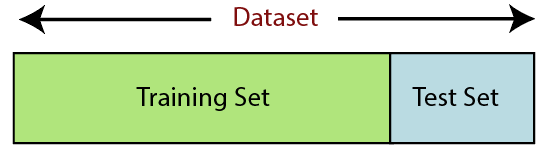

- Training Set: A subset of dataset to train the machine learning model, and we already know the output.

- Test set: A subset of dataset to test the machine learning model, and by using the test set, model predicts the output.

For splitting the dataset, we will use the below lines of code:

In [71]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.2, random_state=0)  

### Explanation:

In the above code, the first line is used for splitting arrays of the dataset into random train and test subsets.
In the second line, we have used four variables for our output that are:

- x_train: features for the training data
- x_test: features for testing data
- y_train: Dependent variables for training data
- y_test: Independent variable for testing data

In *train_test_split()* function, we have passed four parameters in which first two are for arrays of data, and test_size is for specifying the size of the test set. The *test_size* maybe .5, .3, or .2, which tells the dividing ratio of training and testing sets.
The last parameter *random_state* is used to set a seed for a random generator so that you always get the same result, and the most used value for this is 42.

In [72]:
x_train

array([[0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 'Mild', 'High', 'Strong', 'Yes'],
       [0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 'Hot', 'High', 'Weak', 'Yes'],
       [1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 'Mild', 'High', 'Strong', 'No'],
       [1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 'Mild', 'Normal', 'Weak', 'Yes'],
       [1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 'Hot', 'High', 'Strong', 'No'],
       [1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 'Mild', 'High', 'Weak', 'No'],
       [1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 'Mild', 'Normal', 'Strong', 'Yes'],
       [1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 'Mild', 'High', 'Weak', 'Yes'],
       [1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 'Hot', 'High', 'Weak', 'No'],
       [1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 'Cool', 'Normal', 'Strong', 'No'],
       [0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 'Hot', 'Normal', 'Weak', 'Yes']],
      dtype=object)

In [73]:
x_test

array([[1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 'Cool', 'Normal', 'Weak', 'Yes'],
       [0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 'Cool', 'Normal', 'Strong', 'Yes'],
       [1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 'Cool', 'Normal', 'Weak', 'Yes']],
      dtype=object)

In [74]:
y_train

array([9, 5, 4, 3, 7, 3, 6, 2, 8, 0, 7], dtype=int64)

In [75]:
y_test

array([5, 9, 1], dtype=int64)

# 7. Feature Scaling
Feature scaling is the final step of data preprocessing in machine learning. It is a technique to standardize the independent variables of the dataset in a specific range. In feature scaling, we put our variables in the same range and in the same scale so that no any variable dominate the other variable.

For feature scaling, we will import StandardScaler class of sklearn.preprocessing library as:

In [84]:
from sklearn.preprocessing import StandardScaler  

Now, we will create the object of $StandardScaler$ class for independent variables or features. And then we will fit and transform the training dataset.

In [90]:
# Define features (excluding non-numeric columns)
numeric_features = df[['Estimation']]  # Assuming 'Estimation' is the only numeric column, adjust accordingly
non_numeric_features = df.drop(columns=['Outlook', 'Temperature', 'Humidity', 'Windy', 'Play'])

# Apply StandardScaler only to numeric features
scaler = StandardScaler()
numeric_features_scaled = scaler.fit_transform(numeric_features)

# Concatenate scaled numeric features with non-numeric features
x_scaled = np.concatenate((numeric_features_scaled, non_numeric_features.values), axis=1)


In [91]:
# Print the scaled features
print(x_scaled)

[[ 1.85485207 40.        ]
 [ 1.2001984  38.        ]
 [ 0.21821789 35.        ]
 [-0.76376262 32.        ]
 [-1.41841629 30.        ]
 [-2.07306996 28.        ]
 [ 0.         34.33333333]
 [-0.43643578 33.        ]
 [ 0.21821789 35.        ]
 [-0.43643578 33.        ]
 [ 0.54554473 36.        ]
 [ 0.         34.33333333]
 [ 1.2001984  38.        ]
 [-0.10910895 34.        ]]


For test dataset, we will directly apply $transform()$ function instead of *fit_transform()* because it is already done in training set.

In [106]:
# Assuming x_test is defined and contains the test data

# Extract the numeric feature 'Estimation' from the test data
numeric_feature_test = x_test[:, 5].reshape(-1, 1)

# Extract the non-numeric features (categorical) from the test data
non_numeric_features_test = x_test[:, :5]  # Assuming the first 5 columns are non-numeric

# Apply the transformation to the numeric feature using the previously fitted StandardScaler
numeric_feature_test_scaled = scaler.transform(numeric_feature_test)

# Combine the scaled numeric feature with the non-numeric features
x_test_scaled = np.column_stack((numeric_feature_test_scaled, non_numeric_features_test))

# Print the scaled test data
print(x_test_scaled)


[[-10.910894511799619 1.0 0 1 0 0]
 [-11.238221347153608 0.0 1 0 1 0]
 [-11.238221347153608 1.0 0 1 0 1]]


C:\Users\khali\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [107]:
x_train

array([[0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 'Mild', 'High', 'Strong', 'Yes'],
       [0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 'Hot', 'High', 'Weak', 'Yes'],
       [1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 'Mild', 'High', 'Strong', 'No'],
       [1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 'Mild', 'Normal', 'Weak', 'Yes'],
       [1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 'Hot', 'High', 'Strong', 'No'],
       [1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 'Mild', 'High', 'Weak', 'No'],
       [1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 'Mild', 'Normal', 'Strong', 'Yes'],
       [1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 'Mild', 'High', 'Weak', 'Yes'],
       [1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 'Hot', 'High', 'Weak', 'No'],
       [1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 'Cool', 'Normal', 'Strong', 'No'],
       [0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 'Hot', 'Normal', 'Weak', 'Yes']],
      dtype=object)

In [108]:
x_test

array([[1.0, 0, 1, 0, 0, 1, 0, 0, 1, 0],
       [0.0, 1, 0, 1, 0, 0, 0, 0, 0, 0],
       [1.0, 0, 1, 0, 1, 0, 0, 0, 1, 0]], dtype=object)